# Globular Cluster H-R Diagrams

Figure 8.9 from *Stellar Structure & Evolution* by Pinsonneault & Ryden, Cambridge University Press.

Two-panel plot of H-R diagrams for globular clusters 47 Tucanae and M92 from Vasilev & Baumgardt [2021, MNRAS,
505, 5978](https://ui.adsabs.harvard.edu/abs/2021MNRAS.505.5978V). These clusters differ in metallicity by
about 2 orders of magnitude (-0.2 and -2.3, respectively)

Data are from the *Catalogue of stars in Milky Way globular clusters from Gaia EDR3* 
[DOI10.5281/zenodo.4891252](https://zenodo.org/record/4891252#.YkOWkrgpDUK). 

<ul>
    <li>47 Tucanae (NGC104): m-M=13.266, E(B-V)=0.04, [Fe/H]=-0.2
    <li>M92 (NGC6341): m-M=14.595, E(B-V)=0.02, [Fe/H]=-2.3
</ul>

We adopted Gaia band extinction corrections the same as Godoy Rivera et al. 2021:
<ul>
 <li>A<sub>G</sub> = .85926 A<sub>V</sub>
 <li>A<sub>BP</sub> = 1.06794 A<sub>V</sub>
 <li>A<sub>RP</sub> = 0.65199 A<sub>V</sub>
</ul>
with R = A<sub>V</sub>/E(B-V)=3.26

Data are in the `Globulars/` folder.

In [6]:
%matplotlib inline

import os, sys, math
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
from matplotlib.ticker import MultipleLocator, LogLocator, NullFormatter

import warnings
warnings.filterwarnings('ignore',category=UserWarning, append=True)

## Standard Plot Format

Setup the standard plotting format and make the plot.

In [7]:
plotFile = 'Fig8_9.png' 

# graphic aspect ratio = width/height

aspect = 1.8

#
# Don't change these unless you really need to (we never have)
#
# fPage is the horizontal fraction of the page occupied by the figure, default 1.0
#
# scaleFac is the LaTeX includegraphics scaling in units of \textwidth, default 1.0
#

fPage = 1.0
scaleFac = 0.85

# Text width in inches - don't change, this is defined by the print layout

textWidth = 6.0 # inches

# Graphic dimensions depending on bitmap or vector format (draft vs production)

dpi = 600
plotWidth = dpi*fPage*textWidth
plotHeight = plotWidth/aspect
axisFontSize = 10
labelFontSize = 7
lwidth = 0.5
axisPad = 5
wInches = fPage*textWidth # float(plotWidth)/float(dpi)
hInches = wInches/aspect  # float(plotHeight)/float(dpi)
    
# LaTeX is used throughout for markup of symbols, Times-Roman serif font

plt.rc('text', usetex=True)
plt.rc('font', **{'family':'serif','serif':['Times-Roman'],'weight':'bold','size':'16'})

# Font and line weight defaults for axes

matplotlib.rc('axes',linewidth=lwidth)
matplotlib.rcParams.update({'font.size':axisFontSize})

# axis and label padding

plt.rcParams['xtick.major.pad']=f'{axisPad}'
plt.rcParams['ytick.major.pad']=f'{axisPad}'
plt.rcParams['axes.labelpad'] = f'{axisPad}'

## Gaia EDR3 Globular Clusters

In [8]:
clusterList = ['M92','47Tuc']
clusterName = [f'M92\n[Fe/H]=$-$2.3',f'47 Tuc\n[Fe/H]=$-$0.7']
clusterDir = 'Globulars'

MG = {}
color = {}
for cluster in clusterList:
    dataFile = f'{clusterDir}/{cluster}_GaiaEDR3_CMD.csv'
    data = pd.read_csv(dataFile)
    MG[cluster] = np.array(data['MG'])
    color[cluster] = np.array(data['BP-RP'])


### H-R Diagram Evolutionary Phase Labels

Locations of the labels of the primary evolutionary phases on the H-R diagrams for both clusters:
 * MS = main sequence
 * RGB = red giant branch
 * TRGB = tip of the RGB
 * HB = horizontal branch
 * AGB = asymptotic giant branch
 
All text is black except the white text for the main sequence.  

Implement as dictionaries of lists of (x,y) pairs for the labels.  Coordinates are the label centers.

In [9]:
phases = ['MS','RGB','TRGB','HB','AGB']
hrLabels = []

# M92 (metal poor)

m92Labels = {'MS':(0.75,5.5),
             'RGB':(1.3,0.0),
             'TRGB':(1.9,-3.0),
             'HB':(-0.1,0.5),
             'AGB':(0.9,-2.0)}

hrLabels.append(m92Labels)

# 47Tuc (metal rich)

TucLabels = {'MS':(0.9,5.5),
             'RGB':(1.6,0.2),
             'TRGB':(2.8,-2.8),
             'HB':(0.7,0.5),
             'AGB':(1.2,-2.0)}

hrLabels.append(TucLabels)

### Figure 8.9

Two-panel, side-by-side plot of the globular cluster CMDs
 * Left: M92, [Fe/H]=-2.3
 * Right: 47 Tuc, [Fe/H]=-0.7


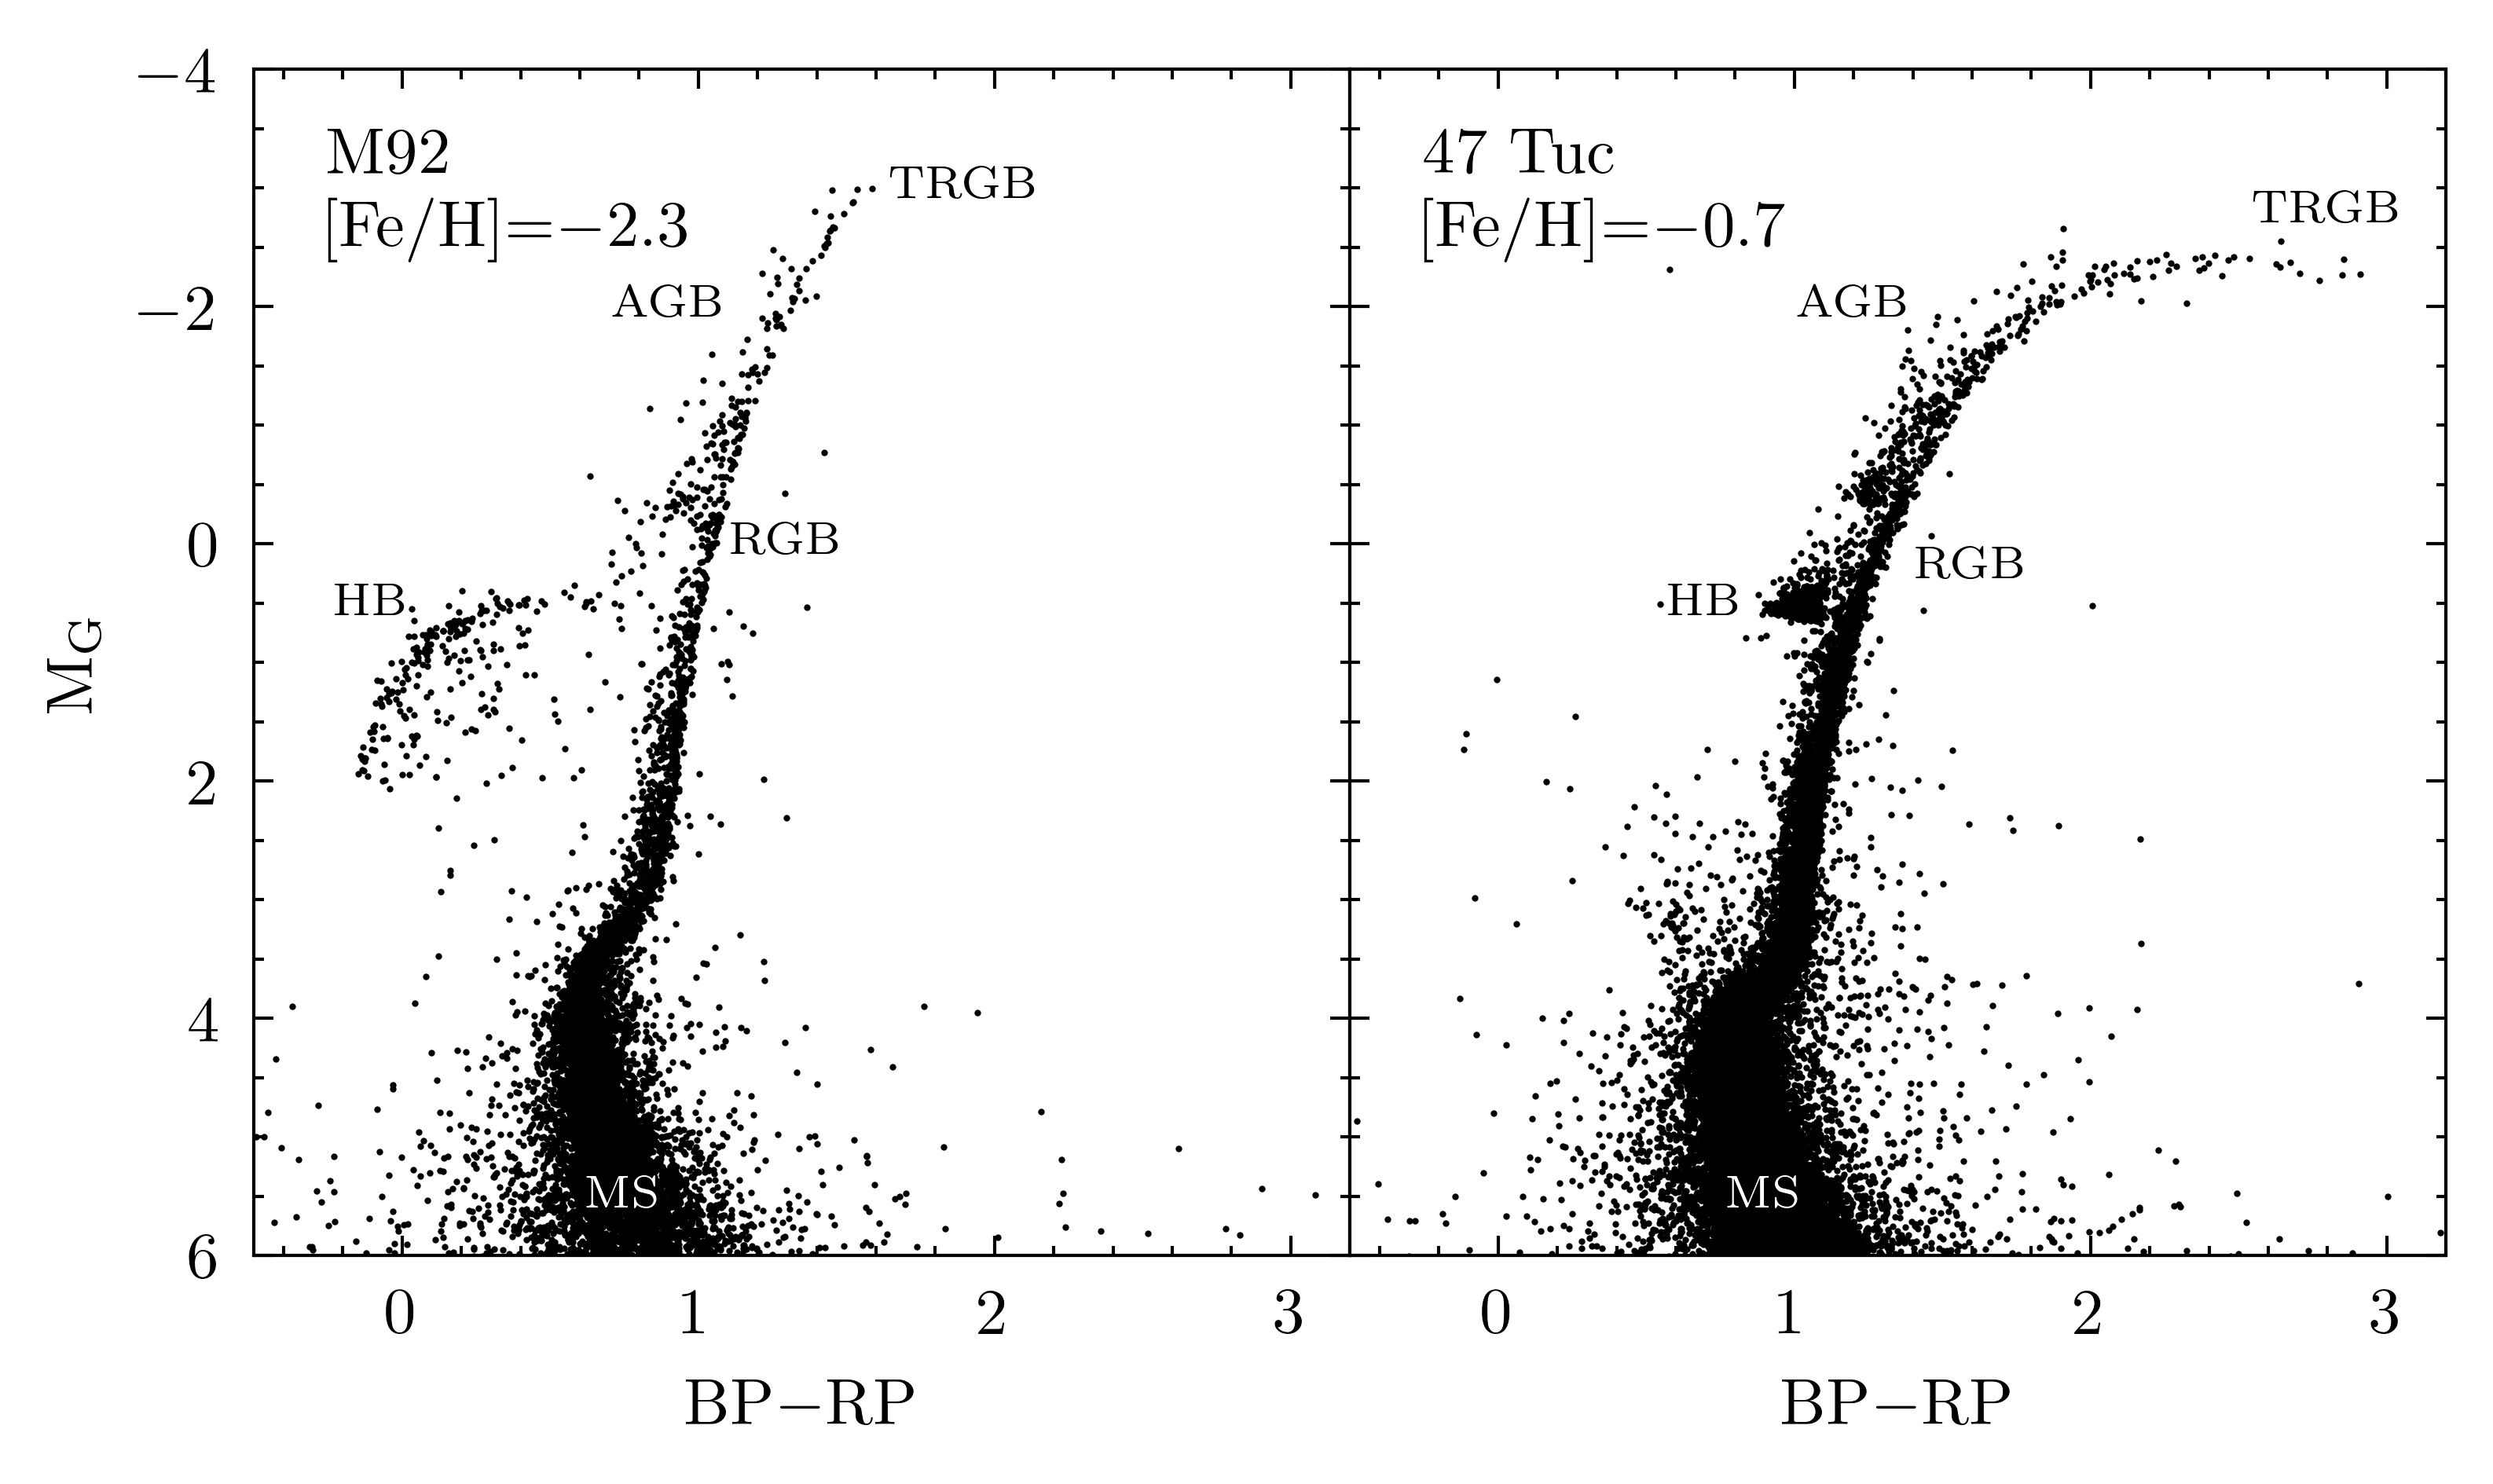

In [10]:
fig,ax = plt.subplots(1,2,figsize=(wInches,hInches),dpi=dpi)
    
fig.subplots_adjust(wspace=0, hspace=0)

# Axis Limits

minColor = -0.5
maxColor = 3.2
minM_G = 6.0
maxM_G = -4.0

for i in range(len(clusterList)):
    cluster = clusterList[i]
    ax[i].set_xlim(minColor,maxColor)
    ax[i].set_ylim(minM_G,maxM_G)
    ax[i].tick_params('both',length=3,width=lwidth,which='major',direction='in',top='on',right='on')
    ax[i].tick_params('both',length=1.5,width=lwidth,which='minor',direction='in',top='on',right='on')
    ax[i].xaxis.set_major_locator(MultipleLocator(1.0))
    ax[i].xaxis.set_minor_locator(MultipleLocator(0.2))
    ax[i].yaxis.set_major_locator(MultipleLocator(2.0))
    ax[i].yaxis.set_minor_locator(MultipleLocator(0.5))
    ax[i].set_xlabel(r'BP$-$RP', fontsize=axisFontSize)
    if i > 0:
        ax[i].axes.yaxis.set_ticklabels([])
    else:
        ax[i].set_ylabel(r'M$_{\rm G}$',fontsize=axisFontSize)
    ax[i].plot(color[cluster],MG[cluster],'o',color='black',ms=1.0,mew=0,alpha=1,zorder=10)
    ax[i].text(-0.25,-3.5,clusterName[i],va='top',ha='left',fontsize=axisFontSize)
    
    # Evolutionary phase labels
    
    for phase in phases:
        (xl,yl) = hrLabels[i][phase]
        if phase == 'MS':
            ax[i].text(xl,yl,phase,va='center',ha='center',color='white',fontsize=labelFontSize,zorder=10)
        else:
            ax[i].text(xl,yl,phase,va='center',ha='center',fontsize=labelFontSize,zorder=10)

plt.plot()
plt.savefig(plotFile,bbox_inches='tight',facecolor='white')